#  Fast Food Restaurants Across America

## Import Libraries

In [175]:
import numpy as np
import pandas as pd
import gmplot
from fuzzywuzzy import process, fuzz

## Getting the Data

In [176]:
data = pd.read_csv('FastFoodRestaurants.csv')

In [177]:
data = data[["address", "city", "country", "latitude", "longitude", "name", "postalCode", "province"]]

In [178]:
data.head()

,address,city,country,latitude,longitude,name,postalCode,province
0,324 Main St,Massena,US,44.92130,-74.89021,McDonald's,13662,NY
1,530 Clinton Ave,Washington Court House,US,39.53255,-83.44526,Wendy's,43160,OH
2,408 Market Square Dr,Maysville,US,38.62736,-83.79141,Frisch's Big Boy,41056,KY
3,6098 State Highway 37,Massena,US,44.95008,-74.84553,McDonald's,13662,NY
4,139 Columbus Rd,Athens,US,39.35155,-82.09728,OMG! Rotisserie,45701,OH


In [179]:
sorted(data.name.unique())

['31st Avenue Gyro',
 '7-11',
 '7-Eleven',
 'A & W Family Restaurant',
 'A&W',
 'A&W All American Food',
 'A&W All-American Food',
 'A&W All-American Foods',
 'A&W Restaurant',
 'A&W/Long John Silvers',
 'A&w',
 'A&w Restaurant',
 "AJ's Hotdogs & Gyros",
 "Alice's",
 'Ama Ristorante',
 'Amigos/Kings Classic',
 'Aprisa Mexican Cuisine',
 "Arby's",
 "Arby's Antigo",
 'Arbys',
 'Arctic Circle',
 'Au Bon Pain',
 "Auntie Anne's",
 'Aw Restaurant',
 'B K',
 'B Z Breakfast Burgers Beyond',
 'B. Good',
 'BGR - The Burger Joint',
 "BIG & little's Restaurant",
 'BLIMPIE',
 'Back Yard Burgers',
 'Backyard Burgers',
 'Bad Daddys Burger Bar',
 'Baja Fresh',
 'Baja Fresh Mexican Grill',
 "Baker's Drive Thru",
 'Ball State Lafollette Dining',
 'Bamboo Bistro',
 'Baskin-Robbins',
 'Bb&t',
 "Ben & Jerry's",
 'Bills Place',
 "Blake's LotaBurger",
 "Blake's Lotaburger",
 'Blakes Lotaburger',
 'Blimpie',
 'Blimpie Subs & Sandwiches',
 'Blondies',
 'Bob Evans',
 'Bob Evans Restaurant',
 "Bobby's Burger Pal

In [180]:
data['lowername'] = data['name'].apply(lambda x : x.lower().strip())

In [181]:
unique_names = sorted(data.lowername.unique())

## Brands with most restaurant chains

In [182]:
restaurants_counts = data.lowername.value_counts()
restaurants_counts = restaurants_counts[restaurants_counts>250]
restaurants_list = list(restaurants_counts.index)
restaurants_list

["mcdonald's",
 'burger king',
 'taco bell',
 "wendy's",
 "arby's",
 'kfc',
 'subway',
 "domino's pizza"]

## Creating an Independent Function for replacement of the matches in the data.

In [183]:
def replace_name(data, column_name, brand, threshold_ratio = 90):
    query = data[column_name].unique()
    results = process.extract(brand, query, limit=10, scorer=fuzz.token_sort_ratio)
    string_matches = [results[0] for results in results if results[1] >= threshold_ratio]
    rows_with_matches = data[column_name].isin(string_matches) 
    data.loc[rows_with_matches, column_name] = brand
    return data.copy()

## Tokens

In [184]:
similar_name_list = list()
for restuarant in restaurants_list:
    query = data['lowername'].unique()
    results = process.extract(restuarant, query, limit=10, scorer=fuzz.token_sort_ratio)
    similar_name_list.append(results)
similar_name_list

##Check the token_sort_ratio upto the closed value.
#mcdonald's - 58
#burger king - 100
#wendy's - 77

[[("mcdonald's", 100),
  ('mcdonald’s', 100),
  ('mcdonalds', 95),
  ("mcdonald's #25557", 77),
  ("mc donald's", 76),
  ("mcdonald's - walmart", 71),
  ('mc donalds', 70),
  ("flash foods / mcdonald's", 62),
  ('mcdonalds @ old atlanta', 58),
  ("denton's", 56)],
 [('burger king', 100),
  ('hamburger king', 88),
  ('burger king salou', 79),
  ("burger's landing", 74),
  ('burger time', 73),
  ('in-n-out burger', 69),
  ('fab wings n burgers', 67),
  ('elevation burger', 67),
  ("nick's burgers", 64),
  ('burgerville', 64)],
 [('taco bell', 100),
  ('kfc / taco bell', 82),
  ('del taco', 82),
  ('kfc/taco bell', 82),
  ('taco bueno', 74),
  ('taco local', 74),
  ('taco delight', 67),
  ('taco del mar', 67),
  ('bravo tacos', 60),
  ('taco cabana', 60)],
 [("wendy's", 100),
  ('wendys', 77),
  ("p. terry's", 50),
  ('los verdes', 47),
  ('subway', 46),
  ('subway®', 46),
  ('wendy two two eight', 46),
  ('pei wei', 43),
  ('31st avenue gyro', 43),
  ("zaxby's", 43)],
 [("arby's", 100),


In [185]:
tokens = [57, 100, 100, 76, 90, 37, 50, 88]
for token, restuarant in zip(tokens, restaurants_list):
    replace_name(data,'lowername',restuarant, token)

In [186]:
data = replace_name(data,'lowername','kentucky fried chicken', 90)
data.loc[data.lowername.str.startswith('kentucky fried chicken'), 'lowername'] = 'kfc'

In [187]:
sorted(data.lowername.unique())

['31st avenue gyro',
 '7-11',
 '7-eleven',
 'a & w family restaurant',
 'a&w',
 'a&w all american food',
 'a&w all-american food',
 'a&w all-american foods',
 'a&w restaurant',
 'a&w/long john silvers',
 "aj's hotdogs & gyros",
 "alice's",
 'ama ristorante',
 'amigos/kings classic',
 'aprisa mexican cuisine',
 "arby's",
 "arby's antigo",
 'arctic circle',
 'au bon pain',
 "auntie anne's",
 'aw restaurant',
 'b k',
 'b z breakfast burgers beyond',
 'b. good',
 'b.good',
 'back yard burgers',
 'backyard burgers',
 'bad daddys burger bar',
 'baja fresh',
 'baja fresh mexican grill',
 "baker's drive thru",
 'ball state lafollette dining',
 'bamboo bistro',
 'baskin-robbins',
 'bb&t',
 "ben & jerry's",
 'bgr - the burger joint',
 "big & little's restaurant",
 'bills place',
 "blake's lotaburger",
 'blakes lotaburger',
 'blimpie',
 'blimpie subs & sandwiches',
 'blondies',
 'bob evans',
 'bob evans restaurant',
 "bobby's burger palace",
 "bojangles' famous chicken 'n biscuits",
 'boston chow

In [188]:
data_top = data[data.lowername.isin(restaurants_list)]

In [189]:
data_top.lowername.value_counts()

mcdonald's        2120
burger king       1154
taco bell          873
wendy's            734
arby's             520
kfc                457
subway             413
domino's pizza     359
Name: lowername, dtype: int64

## Heatmaps

### Heatmap of All Restaurants Data

In [190]:
gmap = gmplot.GoogleMapPlotter.from_geocode('US',5)
#Then generate a heatmap using the latitudes and longitudes
gmap.heatmap(data['latitude'], data['longitude'])

In [191]:
gmap.draw('full_list.html')

### Heatmap of Top Restaurants Data

In [192]:
gmap = gmplot.GoogleMapPlotter.from_geocode('US',5)
#Then generate a heatmap using the latitudes and longitudes
gmap.heatmap(data_top['latitude'], data_top['longitude'])

In [193]:
gmap.draw('top_list.html')

#### Heatmap

![](files/Heatmap of Top Restaurants.png)

## Provinces with most number of top restaurants

In [194]:
data_top = data_top[["country", "province", "city", "lowername"]]
data_top

,country,province,city,lowername
0,US,NY,Massena,mcdonald's
1,US,OH,Washington Court House,wendy's
3,US,NY,Massena,mcdonald's
5,US,OH,Hamilton,domino's pizza
6,US,OH,Englewood,domino's pizza
7,US,SC,Saluda,mcdonald's
8,US,SC,Batesburg,wendy's
11,US,AR,Monticello,domino's pizza
12,US,OK,Oklahoma City,mcdonald's
13,US,KY,Lexington,domino's pizza


In [223]:
%matplotlib inline
data_top_province = data_top.province.value_counts()
data_top_province

OH         396
CA         369
TX         354
FL         330
IN         303
IL         260
NC         235
PA         234
KY         228
NY         223
VA         221
GA         218
MO         203
MI         196
LA         157
AL         155
SC         140
WA         137
WI         132
OK         132
TN         131
AZ         121
IA         114
UT         106
CO         104
MD         103
MN         101
NJ         100
MA          98
NM          91
AR          89
OR          80
CT          76
WV          73
SD          66
NV          62
ID          58
KS          56
NE          55
MS          50
VT          41
ME          38
WY          32
ND          28
NH          27
DE          23
RI          21
HI          20
MT          17
DC          12
AK          10
Co Spgs      4
Name: province, dtype: int64

In [225]:
data_top_province_list = list(data_top_province[data_top_province>200].index)
data_top_province_list

['OH', 'CA', 'TX', 'FL', 'IN', 'IL', 'NC', 'PA', 'KY', 'NY', 'VA', 'GA', 'MO']

In [226]:
data_top_province_top = data_top[data_top.province.isin(data_top_province_list)]

In [227]:
data_top_province_top

,country,province,city,lowername
0,US,NY,Massena,mcdonald's
1,US,OH,Washington Court House,wendy's
3,US,NY,Massena,mcdonald's
5,US,OH,Hamilton,domino's pizza
6,US,OH,Englewood,domino's pizza
13,US,KY,Lexington,domino's pizza
15,US,KY,Louisville,mcdonald's
17,US,NC,Leland,taco bell
18,US,NC,Leland,mcdonald's
20,US,NC,Leland,mcdonald's


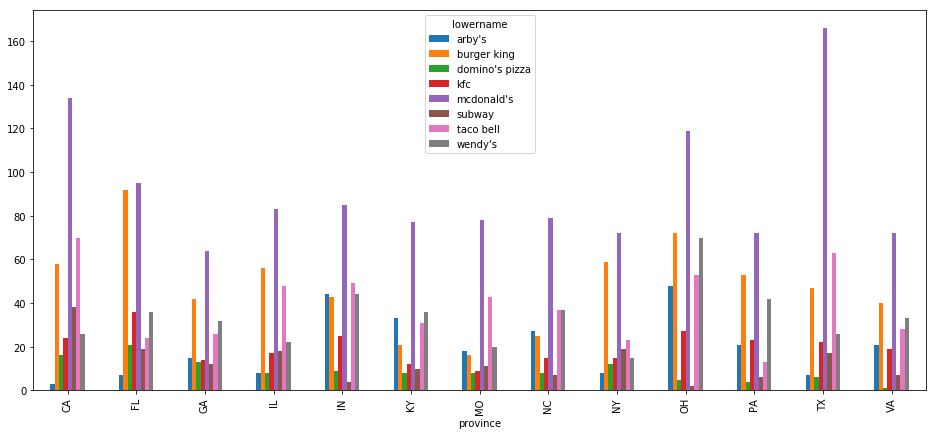

In [217]:
data_top_province_top_group = data_top_province_top.groupby(['province','lowername'])
data_top_province_top_group.size().unstack().plot(kind ='bar', figsize =(16,7))